## Problem 1

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(MASS)
library(rootSolve)
library(ggplot2)
library(lattice)
library(plotly)

/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘plotly’


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:ggplot2’:

    last_plot


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:MASS’:

    select


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:stats’:

    filter


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:graphics’:

    layout


  warnings.warn(x, RRuntimeWarning)


In [28]:
%%R

#We define the function we're going to analyze

f <- function(x, m, A) {
    result <- 0.5*t(x-m)%*%A%*%(x-m)-sum(log(x^2))
    return(result)
}

# In this case we're lookig for a minimum, to look for a maximum we just have to change the minus by a plus
# in the creation of x1

gradient_descent <- function(iter = 0,lambda, f, xg, ...) {
    
    
    x1 <- xg - lambda*t(gradient(f, xg, m = m, A = A))
    if (dist(rbind(t(x1),t(xg))) < 1e-6) {
        return(list(x1, iter))
    }
    
    else {
        return(gradient_descent(iter=iter+1,lambda, f, xg=x1, m=m, A=A))
    }
}

#In this version of gradient descent we use the basic backtracking to assign t

gradient_descent2 <- function(iter = 0, f, xg, ...) {
    lambda = 1
    
    while(f(x = (xg - lambda*t(gradient(f, xg, m = m, A = A))), m=m, A=A)>f(xg,m=m,A=A)){
        lambda <- lambda/2
    }
    
    x1 <- xg - lambda*t(gradient(f, xg, m = m, A = A))
    if (dist(rbind(t(x1),t(xg))) < 1e-6) {
        return(list(x1, iter))
    }
    
    else {
        return(gradient_descent2(iter=iter+1, f, xg=x1, m=m, A=A))
    }
}

#Now we definde the polyak momentum algorithm which considers the previous movements of the function 

polyak_momentum <- function(iter = 0,lambda, a, xf = 0, f, xg,  ...) {
    
    if (iter == 0) {
         x1 <- xg - lambda*t(gradient(f, xg, m = m, A = A))
    }
    
    else {
    x1 <- xg - lambda*t(gradient(f, xg, m = m, A = A)) + a*(xg-xf)
    }
    
    xf <- xg
    if (dist(rbind(t(x1),t(xg))) < 1e-6) {
        return(list(x1, iter))
    }
    
    else {
        return(polyak_momentum(iter = iter+1 ,lambda, a, xf=xg, f, xg=x1, m=m, A=A))
    }
}


# as in 
polyak_momentum2 <- function(iter = 0, a, xf = 0, f, xg,  ...) {
    lambda = 1
    while(f(x = (xg - lambda*t(gradient(f, xg, m = m, A = A)) + a*(xg-xf)), m=m, A=A)>f(xg,m=m,A=A)){
        lambda <- lambda/2
    }
    
    x1 <- xg - lambda*t(gradient(f, xg, m = m, A = A)) + a*(xg-xf)
    xf <- xg
    if (dist(rbind(t(x1),t(xg))) < 1e-6) {
        return(list(x1, iter))
    }
    
    else {
        return(polyak_momentum2(iter = iter+1, a, xf=xg, f, xg=x1, m=m, A=A))
    }
}


newton <- function(lambda, f, xg, ...) {
    x1 <- xg - lambda*solve(hessian(f, xg, m = m, A=A))%*%t(gradient(f, xg, m = m, A = A))
    if (dist(rbind(t(x1),t(xg))) < 1e-6) {
        return(x1)
    }
    
    else {
        return(newton(lambda, f, xg=x1, m=m, A=A))
    }
}

posdef <- function (n, ev = runif(n, 0, 10)) 
{
    Z <- matrix(ncol=n, rnorm(n^2))
    decomp <- qr(Z)
    Q <- qr.Q(decomp) 
    R <- qr.R(decomp)
    d <- diag(R)
    ph <- d / abs(d)
    O <- Q %*% diag(ph)
    Z <- t(O) %*% diag(ev) %*% O
    return(Z)
}


**Let  $x\in R^{n}$ and consider the function:**


$$ 
f(x) = \frac{1}{2}(x-m)^{T}A(x-m)-\sum_{i=1}^{n}log(x_i^{2})
$$

**where $m\in R^{n}$ is a fixed vector and $A\in S_{++}^{n}$ is a fixed positive definite matrix. Implement the gradient descent method for the problem of *minimizing* this function.**

**Now focus on the two-dimensional case (n = 2). Fix m = (0.5, 0). Study convergence of this method depending on $\rho \in (-1,1)$ in**

$$
A=
\left[\begin{array}{cc} 
1 & \rho \\ 
\rho & 1
\end{array}\right]
$$ 


<table>
    <tr>
        <td>
        <img src="rho=1.JPG" alt="Drawing" style="width: 500px;"/> 
        </td>
        <td>
        <img src="rho=0.5.JPG" alt="Drawing" style="width: 500px;"/>
        </td>
    </tr>
    <tr>
        <td>
        <img src="rho=0.JPG" alt="Drawing" style="width: 500px;"/>
        </td>
        <td>
        <img src="rho=-0.5.JPG" alt="Drawing" style="width: 500px;"/>
        </td>
    </tr>
 </table>
 
 
In the table we can see the plots for the function when $\rho$ = 1 (top left), $\rho$ = 0.5 (top right), $\rho$ = 0 (bottom left) and $\rho$ = -0.5 (bottom right). As we can see the function is convex and unbounded from above. Moreover, it seems that it has four different minimums, one in each quadrant. 

Analitically we can find the solution for $\rho$ = 0, where the mimimums are situated in the points:

$$\begin{array}{c}
(1.68,\sqrt{2}) \cr
(1.68, -\sqrt{2}) \cr
(-1.19, \sqrt{2}) \cr
(-1.19, -\sqrt{2}) \cr
\end{array}
$$

In [38]:
%%R
m <- matrix(c(0.5, 0), ncol = 1)
A <- rbind(c(1, 0), c(0,1))
x0 <- matrix(c(-1, -1) , ncol=1)


We solve for the case where rho = 0, to see if the function works:

In [39]:
%%R
print(gradient_descent(lambda=0.3,f=f, xg=x0, m=m, A=A))
print(polyak_momentum(lambda=0.3, a=0.5, f=f, xg=x0, m=m, A=A))

[[1]]
          [,1]
[1,] -1.186141
[2,] -1.414213

[[2]]
[1] 14

[[1]]
          [,1]
[1,] -1.186140
[2,] -1.414214

[[2]]
[1] 37



In [40]:
%%R
x0 <- matrix(c(1, 1) , ncol=1)
print(gradient_descent(lambda=0.3, f=f, xg=x0, m=m, A=A))
polyak_momentum(lambda=0.3, a=0.5, f=f, xg=x0, m=m, A=A)

[[1]]
         [,1]
[1,] 1.686140
[2,] 1.414214

[[2]]
[1] 18

[[1]]
         [,1]
[1,] 1.686140
[2,] 1.414214

[[2]]
[1] 38



In [41]:
%%R
x0 <- matrix(c(-1, 1) , ncol=1)
print(gradient_descent(lambda=0.3, f=f, xg=x0, m=m, A=A))
polyak_momentum(lambda=0.3, a=0.5, f=f, xg=x0, m=m, A=A)

[[1]]
          [,1]
[1,] -1.186141
[2,]  1.414213

[[2]]
[1] 14

[[1]]
          [,1]
[1,] -1.186140
[2,]  1.414214

[[2]]
[1] 37



In [42]:
%%R
x0 <- matrix(c(1, -1) , ncol=1)
print(gradient_descent(lambda=0.3, f=f, xg=x0, m=m, A=A))
print(polyak_momentum(lambda=0.3, a=0.5, f=f, xg=x0, m=m, A=A))

[[1]]
          [,1]
[1,]  1.686140
[2,] -1.414214

[[2]]
[1] 18

[[1]]
          [,1]
[1,]  1.686140
[2,] -1.414214

[[2]]
[1] 38



Once we have checked that the algorithms work correctly, we use them to analyze convergence of the function depending on the $\rho$ parameter. 

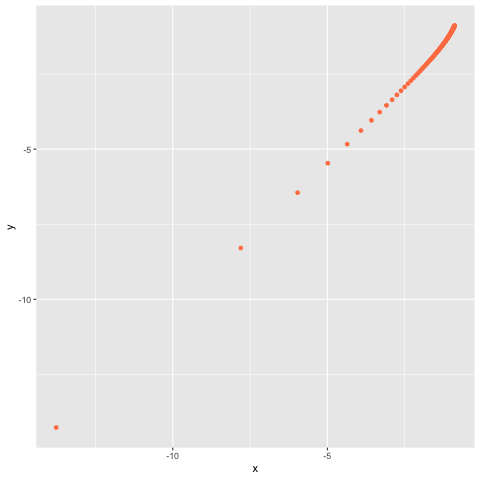

In [51]:
%%R
m <- matrix(c(0.5, 0), ncol = 1)
x0<- matrix(c(-1, -1) , ncol=1)
resultx<-c()
resulty<-c()
for (i in seq(-0.99, 0.99, length=100) ) {
   A <- rbind(c(1, i), c(i,1))
   resultx <- c(resultx, gradient_descent(lambda=0.3,f=f, xg=x0, m=m, A=A)[[1]][1])
   resulty <- c(resulty, gradient_descent(lambda=0.3,f=f, xg=x0, m=m, A=A)[[1]][2])  
}

results <- data.frame(x=resultx, y = resulty)
ggplot(results)+
    geom_point( aes(x=x,y=y), color = "coral")

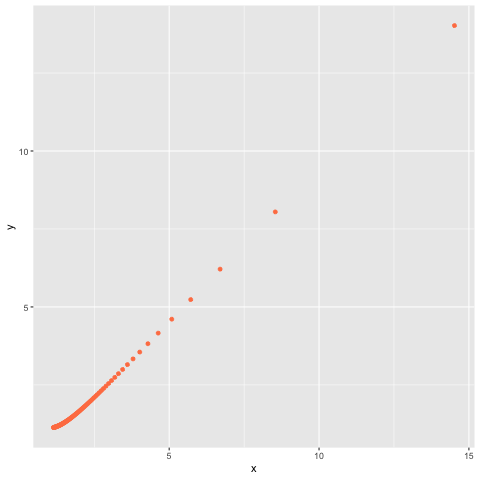

In [52]:
%%R
m <- matrix(c(0.5, 0), ncol = 1)
x0<- matrix(c(1, 1) , ncol=1)
resultx<-c()
resulty<-c()
for (i in seq(-0.99, 0.99, length=100) ) {
   A <- rbind(c(1, i), c(i,1))
   resultx <- c(resultx, gradient_descent(lambda=0.3,f=f, xg=x0, m=m, A=A)[[1]][1])
   resulty <- c(resulty, gradient_descent(lambda=0.3,f=f, xg=x0, m=m, A=A)[[1]][2])  
}

results <- data.frame(x=resultx, y = resulty)
ggplot(results)+
    geom_point( aes(x=x,y=y), color = "coral")

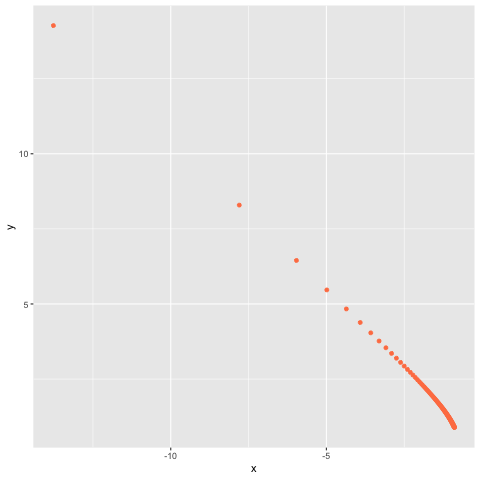

In [53]:
%%R
m <- matrix(c(0.5, 0), ncol = 1)
x0<- matrix(c(-1, 1) , ncol=1)
resultx<-c()
resulty<-c()
for (i in seq(-0.99, 0.99, length=100) ) {
   A <- rbind(c(1, i), c(i,1))
   resultx <- c(resultx, gradient_descent(lambda=0.3,f=f, xg=x0, m=m, A=A)[[1]][1])
   resulty <- c(resulty, gradient_descent(lambda=0.3,f=f, xg=x0, m=m, A=A)[[1]][2])  
}

results <- data.frame(x=resultx, y = resulty)
ggplot(results)+
    geom_point( aes(x=x,y=y), color = "coral")



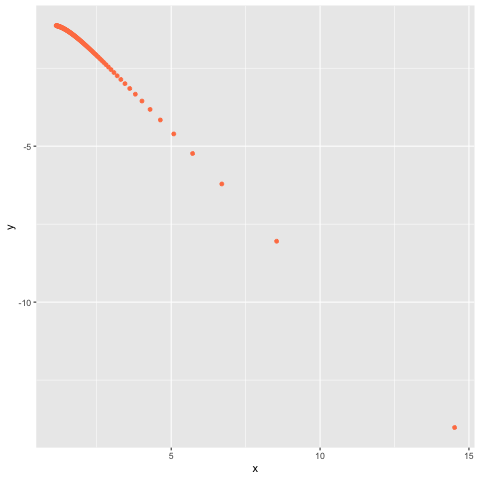

In [54]:
%%R
m <- matrix(c(0.5, 0), ncol = 1)
x0<- matrix(c(1, -1) , ncol=1)
resultx<-c()
resulty<-c()
for (rho in seq(-0.99, 0.99, length=100) ) {
   A <- rbind(c(1, rho), c(rho,1))
   resultx <- c(resultx, gradient_descent(lambda=0.3,f=f, xg=x0, m=m, A=A)[[1]][1])
   resulty <- c(resulty, gradient_descent(lambda=0.3,f=f, xg=x0, m=m, A=A)[[1]][2])  
}

results <- data.frame(x=resultx, y = resulty)
ggplot(results)+
    geom_point( aes(x=x,y=y), color = "coral")

As we can see in the graphs, whenever $\rho$ gets closer to 1 or -1 the algorithm don't converge since on those values of $\rho$ the function has no minimum in two of their quadrants, since the function on those quadrants becomes monotonically decreasing towards 0 (as suggested by the 3D plots above).

**Try to propose another line search method that overall performs better (e.g. in convergence rate or the number of iterations needed). Make a contour plot with sample paths of both algorithms.Optimizing functions of this kind has recently become important in Bayesian model selection procedures involving high-dimensional regression problems (non-local priors). In that case n will be much larger, say between 100 and 1000.  Choosing random values for m and A study (by simulations) how the performance of the gradient descent method and your proposed algorithm scales with n.**

In [46]:
%%R
options(expressions=100000)

# We generate two vectors in order to store the number of iterations for each value of n

gd_eff <- c()
pm_eff <- c()

# We limit our analysis to n=150 since the recursion may go too deep and an error appear

for (i in 2:150) {
    
    m <- matrix(rnorm(i), ncol = 1)
    A <- posdef(i)
    x0 <- matrix(rep(0.01, i) , ncol=1)
    gd <- gradient_descent(lambda = 0.01, f=f, xg=x0, m=m, A=A)
    pm <- polyak_momentum(lambda = 0.01, a=0.5, f=f, xg=x0, m=m, A=A)

    gd_eff <- c(gd_eff, gd[[2]])
    pm_eff <- c(pm_eff, pm[[2]])

}


Error in match("names", names(value)) : node stack overflow


In [48]:
%%R

# Here we can see how many iterations were achieved before the error appears
# this may be solved using a while rather than a recursive function

print(gd_eff)
print(pm_eff)

  [1]  558  122  174  169  285  174  271  254  191  426  231  236  233  382  625
 [16]  791  412  411  368  341  351  342  595  437  430  375 1289  343  593  455
 [31]  399  405  406  563  436  639  636  591  409  598  325  287  422  367  314
 [46]  798  422  382  581  875  595  472  381  351  292  413  361  679  386  489
 [61]  440  389  350  390  536  323  469  455  456  374  336  488  315  402  396
 [76]  396  400  584  416  481  412  345  498  488  389  396  414  424  420  540
 [91]  425  365  443  520  366  457  523  390  410  358  452  436  452  435  403
[106]  503  423  405  410  537  489  405  490  596  571  656  581  523  402  400
[121]  616
  [1] 345 105  86  89 175  85 206 145 135 304 135 134 154 246 399 501 249 256
 [19] 345 203 298 259 409 311 282 236 700 359 374 315 248 276 385 346 343 483
 [37] 405 378 255 376 185 188 230 268 226 567 274 294 437 507 528 311 226 352
 [55] 236 288 249 473 230 434 355 315 231 275 337 257 317 401 285 258 252 348
 [73] 264 288 305 303 240 332

[1] 440.5124
[1] 322.8182


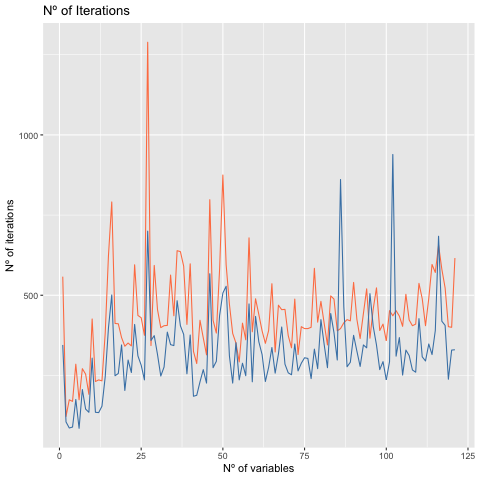

In [55]:
%%R
# As we can see in average polyaks momentum algorithm performs better than the gradient 

x <- seq(1,length(gd_eff))
data <- data.frame(x, gd_eff, pm_eff)

print(mean(gd_eff))
print(mean(pm_eff))

ggplot(data, aes(x = x))+
    geom_line(aes(y=gd_eff), color = "coral")+
    geom_line(aes(y=pm_eff), color = "steelblue")+
    labs(title="Nº of Iterations", x = "Nº of variables", y = "Nº of iterations")



In [58]:
%%R
print(summary(lm(log(gd_eff) ~ x)))
print(summary(lm(log(pm_eff) ~ x)))


Call:
lm(formula = log(gd_eff) ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05246 -0.15435 -0.04485  0.12048  1.22886 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.8503822  0.0568978 102.823  < 2e-16 ***
x           0.0030509  0.0008094   3.769 0.000256 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.311 on 119 degrees of freedom
Multiple R-squared:  0.1067,	Adjusted R-squared:  0.09914 
F-statistic: 14.21 on 1 and 119 DF,  p-value: 0.0002564


Call:
lm(formula = log(pm_eff) ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00424 -0.19970 -0.02702  0.20910  1.00642 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.418954   0.066355  81.667  < 2e-16 ***
x           0.004656   0.000944   4.932 2.67e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3627 on 119 degrees of freedom


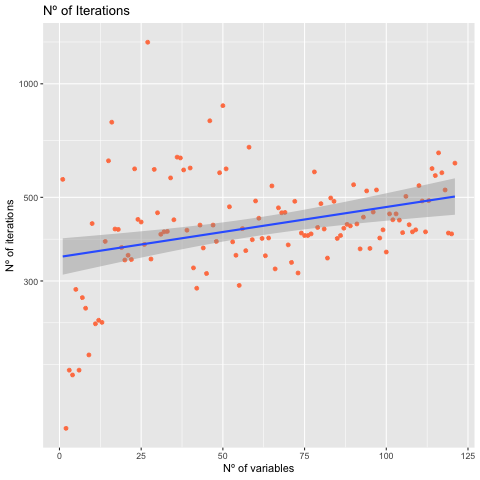

In [63]:
%%R
ggplot(data, aes(x = x, y = gd_eff))+
    scale_y_log10()+
    geom_point(color = "coral")+
    geom_smooth(method = "lm") +
    labs(title="Nº of Iterations", x = "Nº of variables", y = "Nº of iterations")


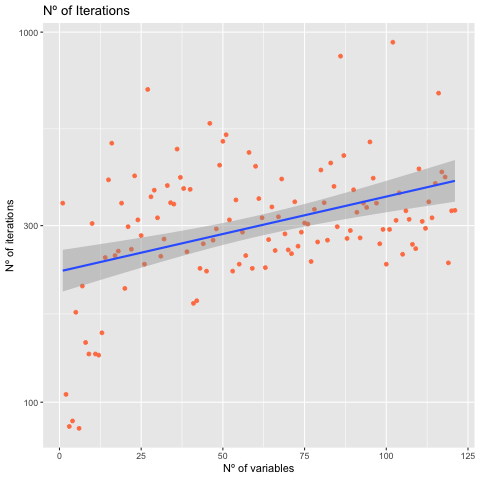

In [64]:
%%R
ggplot(data, aes(x = x, y = pm_eff))+
    scale_y_log10()+
    geom_point(color = "coral")+
    geom_smooth(method = "lm") +
    labs(title="Nº of Iterations", x = "Nº of variables", y = "Nº of iterations")

As we can see, although an increase in 1 variable increases polyaks momentum number of iterations by 0.4% and 0.3% for gradient descent, the intercept is lower for polyaks, implying a consistently higher efficiency for it. However, as we can see, with a recursive function it is unfeasible to compute problems with more than 150 variables. 

In [93]:
%%R
m <- matrix(c(0.5, 0), ncol = 1)
A <- rbind(c(1, 0.2), c(0.2,1))
x0 <- matrix(c(1, 1) , ncol=1)

xg1<-c()
xg2<-c()
contour_gd<-c()
while (abs(gradient(f, x0, m = m, A = A)[1]) > 1e-30) {
    contour_gd <-c(contour_gd, f(x0,m=m,A=A))
    xg1<-c(xg1,x0[1])
    xg2<-c(xg2,x0[2])
    x0 <- x0 - 0.3*t(gradient(f, x0, m = m, A = A))
}

m <- matrix(c(0.5, 0), ncol = 1)
A <- rbind(c(1, 0.2), c(0.2,1))
x1 <- matrix(c(1, 1) , ncol=1)
x0 <- matrix(c(0, 0) , ncol=1)
xp1 <-c()
xp2 <-c()
contour_pm<-c()

iter <- 0
while (abs(gradient(f, x1, m = m, A = A)[1]) > 1e-30) {
    contour_pm <- c(contour_pm, f(x1,m=m,A=A))
    xp1<-c(xp1, x1[1])
    xp2<-c(xp2, x1[2])
    diff <- x1-x0
    x0<-x1
    if (iter == 0) {x1 <- x1 - 0.3*t(gradient(f, x1, m = m, A = A))}
    else {x1 <- x1 - 0.3*t(gradient(f, x1, m = m, A = A)) + 0.3*diff}
    
    iter=iter+1
}

In [94]:
%%R
print(contour_gd)
print(contour_pm)

 [1] 0.7250000 0.2919187 0.2710882 0.2682863 0.2678076 0.2677140 0.2676943
 [8] 0.2676900 0.2676890 0.2676888 0.2676887 0.2676887 0.2676887 0.2676887
[15] 0.2676887 0.2676887 0.2676887 0.2676887 0.2676887 0.2676887 0.2676887
[22] 0.2676887 0.2676887
 [1] 0.7250000 0.2919187 0.2775095 0.2788378 0.2696161 0.2678715 0.2679162
 [8] 0.2677494 0.2676964 0.2676945 0.2676904 0.2676889 0.2676889 0.2676888
[15] 0.2676887 0.2676887 0.2676887 0.2676887 0.2676887 0.2676887 0.2676887
[22] 0.2676887 0.2676887 0.2676887 0.2676887 0.2676887 0.2676887 0.2676887
[29] 0.2676887 0.2676887


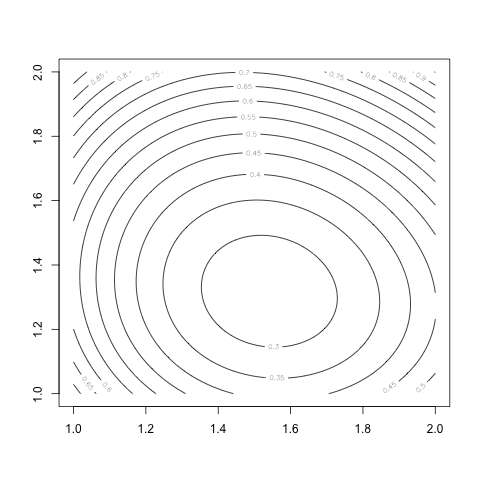

In [95]:
%%R
m <- matrix(c(0.5, 0), ncol = 1)
A <- rbind(c(1, 0.2), c(0.2,1))
x <- seq(1, 2, length=200)
y <- seq(1, 2, length=200)
z <- outer(x, y, Vectorize( function(x,y) f(x=matrix(c(x,y), ncol=1), m=m, A=A) ) )
contour(x=x, y=y, z)

In [96]:
%%R
plot_ly(x=x, y=y, z=t(z), type="contour")%>%
        add_trace(x=xg1, y = xg2, type="scatter", mode="line")

In [98]:
%%R
plot_ly(x=x, y=y, z=t(z), type="contour")%>%
        add_trace(x=xp1, y = xp2, type="scatter", mode="line")

<table>
    <tr>
        <td>
        <img src="GD11.png" alt="Drawing" style="width: 800px;"/> 
        </td>
        <td>
        <img src="PM11.png" alt="Drawing" style="width: 800px;"/>
        </td>
    </tr>
 </table>

In [132]:
%%R
# In this case we will change the quadrant and also the momentum of the polyaks algorithm to see how the nº of iterations
# varies 
m <- matrix(c(0.5, 0), ncol = 1)
A <- rbind(c(1, 0.2), c(0.2,1))
x0 <- matrix(c(-0.5, -0.5) , ncol=1)

xg1<-c()
xg2<-c()
contour_gd<-c()
while (abs(gradient(f, x0, m = m, A = A)[1]) > 1e-30) {
    contour_gd <-c(contour_gd, f(x0,m=m,A=A))
    xg1<-c(xg1,x0[1])
    xg2<-c(xg2,x0[2])
    x0 <- x0 - 0.2*t(gradient(f, x0, m = m, A = A))
}

m <- matrix(c(0.5, 0), ncol = 1)
A <- rbind(c(1, 0.2), c(0.2,1))
x1 <- matrix(c(-0.5, -0.5) , ncol=1)
x0 <- matrix(c(0, 0) , ncol=1)
xp1 <-c()
xp2 <-c()
contour_pm<-c()

iter <- 0
while (abs(gradient(f, x1, m = m, A = A)[1]) > 1e-30) {
    contour_pm <- c(contour_pm, f(x1,m=m,A=A))
    xp1<-c(xp1, x1[1])
    xp2<-c(xp2, x1[2])
    diff <- x1-x0
    x0<-x1
    if (iter == 0) {x1 <- x1 - 0.3*t(gradient(f, x1, m = m, A = A))}
    else {x1 <- x1 - 0.2*t(gradient(f, x1, m = m, A = A)) + 0.1*diff}
    
    iter=iter+1
}

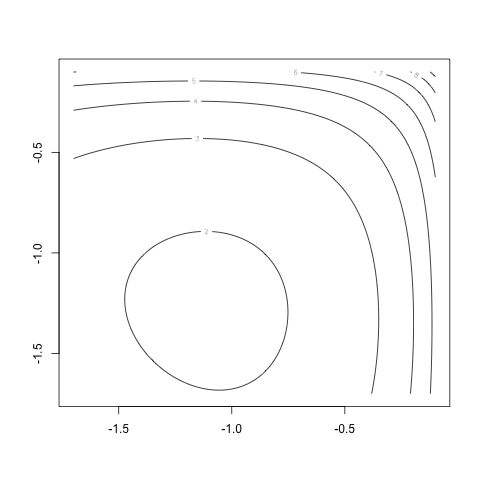

In [133]:
%%R
m <- matrix(c(0.5, 0), ncol = 1)
A <- rbind(c(1, 0.2), c(0.2,1))
x <- seq(-1.7, -0.1, length=200)
y <- seq(-1.7, -0.1, length=200)
z <- outer(x, y, Vectorize( function(x,y) f(x=matrix(c(x,y), ncol=1), m=m, A=A) ) )
contour(x=x, y=y, z)

In [138]:
%%R
print(contour_gd)
print(contour_pm)

 [1] 3.497589 1.836798 1.827342 1.824904 1.824215 1.824011 1.823949 1.823929
 [9] 1.823923 1.823921 1.823920 1.823920 1.823920 1.823920 1.823920 1.823920
[17] 1.823920 1.823920 1.823920 1.823920 1.823920 1.823920 1.823920 1.823920
[25] 1.823920 1.823920 1.823920 1.823920
 [1] 3.497589 1.988586 1.950324 1.856152 1.829086 1.824576 1.824010 1.823936
 [9] 1.823923 1.823921 1.823920 1.823920 1.823920 1.823920 1.823920 1.823920
[17] 1.823920 1.823920 1.823920 1.823920 1.823920 1.823920 1.823920 1.823920


Clearly, with a lower momentum, Polyaks' algorithms performs better.

In [139]:
%%R
plot_ly(x=x, y=y, z=t(z), type="contour") %>%
        add_trace(x=xg1, y = xg2, type="scatter", mode="line")

In [140]:
%%R
plot_ly(x=x, y=y, z=t(z), type="contour") %>%
        add_trace(x=xp1, y = xp2, type="scatter", mode="line")

<table>
    <tr>
        <td>
        <img src="GD-1-1.png" alt="Drawing" style="width: 800px;"/> 
        </td>
        <td>
        <img src="PM-1-1.png" alt="Drawing" style="width: 800px;"/>
        </td>
    </tr>
 </table>

As we can see, with a lower momentum Polyak's algorithm performs better than gradient descent, although it takes much bigger steps. The size of this steps and the nº of iterations must be optimized by regulating both the lambda parameter (step size) and the momentum parameter of the algorithm.